In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,classification_report,confusion_matrix
from mlxtend.data import mnist_data
from matplotlib.colors import ListedColormap
from sklearn.utils import shuffle

In [2]:
X,Y=mnist_data()
X,Y = shuffle(X, Y, random_state=42)
X=X[1:1000]
Y=Y[1:1000]
print(X.shape)
print(Y.shape)

(999, 784)
(999,)


In [0]:
def plot_digit(X,Y,idx):
    img=X[idx].reshape(28,28)
    plt.imshow(img,cmap='Greys')#,interpolation='nearest')
    plt.title('true label: %d' %Y[idx])
    plt.show()

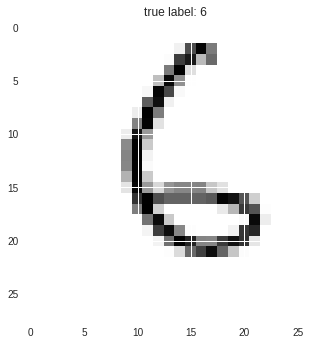

In [4]:
plot_digit(X,Y,96)

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [0]:
#Standardize data
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [7]:
logreg=LogisticRegression(C=1e5,random_state=42)
logreg.fit(X_train_std,y_train)
y_pred=logreg.predict(X_test_std)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [8]:
#Build Confusion Matrix
C_M=confusion_matrix(y_test,y_pred)
print(C_M)

[[25  0  0  0  0  0  1  0  1  0]
 [ 0 34  0  0  1  0  0  0  1  1]
 [ 0  3 17  2  1  3  5  2  2  2]
 [ 0  1  0 15  0  1  0  1  0  0]
 [ 0  1  3  0 26  0  0  0  0  0]
 [ 0  2  2  0  2 23  0  0  1  0]
 [ 2  0  1  0  0  0 22  0  0  2]
 [ 0  3  0  0  2  0  0 30  0  1]
 [ 1  3  2  0  0  1  1  0 18  1]
 [ 1  0  0  0  1  0  0  6  0 23]]


In [9]:
#print accuracy output
R2=r2_score(y_test,y_pred)
print(R2)

0.475676444556834


In [10]:
#print Classification Report
C_R=classification_report(y_test,y_pred)
print(C_R)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.72      0.92      0.81        37
           2       0.68      0.46      0.55        37
           3       0.88      0.83      0.86        18
           4       0.79      0.87      0.83        30
           5       0.82      0.77      0.79        30
           6       0.76      0.81      0.79        27
           7       0.77      0.83      0.80        36
           8       0.78      0.67      0.72        27
           9       0.77      0.74      0.75        31

   micro avg       0.78      0.78      0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.77      0.78      0.77       300



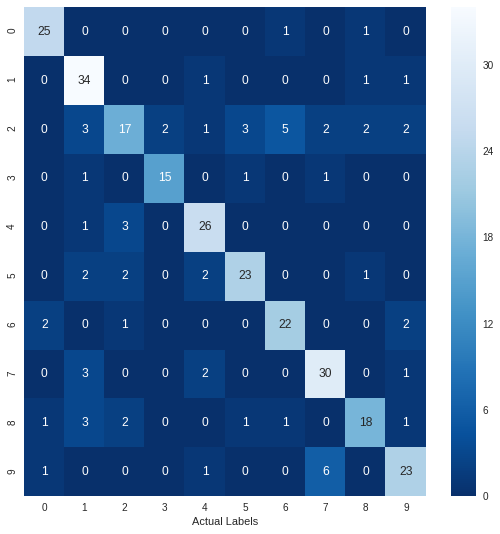

In [11]:
#plot
plt.figure(figsize=(9,9))
sns.heatmap(C_M,annot=True,cmap='Blues_r')
plt.xlabel('Predicted Labels')
plt.xlabel('Actual Labels')
plt.show()